This exercise is solving a task for a mining company that is looking to determine a best place for a new well. The company has data for three regions. The following steps are required to chose the best location for a new well:
   - collect the oil well parameters in the selected region: oil quality and volume of reserves;
   - build a model for predicting the volume of reserves in the new wells;
   - pick the oil well with the highest estimated values;
   - pick the reguion with the highest total profit for the selected oil wells.

In [49]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os

Download and prepare the data

In [50]:
os.chdir(os.path.join(os.getcwd(), "pathpath=os.getcwd()

In [51]:
region0=pd.read_csv('geo_data_0 (1).csv')
region1=pd.read_csv('geo_data_1 (1).csv')
region2=pd.read_csv('geo_data_2 (1).csv')

In [52]:
print(region0.isna().mean())
print(region0.duplicated().sum()) # there are 100000 entries, no duplicates, no missing values
region0=region0.drop(['id'], axis=1) # drop the variable that is useless 

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64
0


In [53]:
region1=region1.drop(['id'], axis=1) 
display(region1.info())
display(region1.isna().mean())
region1.duplicated().sum() #no missing values, no duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


None

f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

0

In [54]:
region2=region2.drop(['id'], axis=1)
region2.info()
print(region2.isna().mean())
print(region2.duplicated().sum()) # no missing values, no duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64
0


2.Train and test the model for region 0

In [55]:
target=region0['product']
features=region0.drop(['product'], axis=1)

state=random_state=12345
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=state)
scaler=StandardScaler()

numeric=['f0', 'f1', 'f2'] # standardizing features
scaler.fit(features)
features_train[numeric]=scaler.transform(features_train[numeric])
features_valid[numeric]=scaler.transform(features_valid[numeric])

model=LinearRegression().fit(features_train, target_train)
predictions0=model.predict(features_valid)

mse=mean_squared_error(target_valid, predictions0)
print('rmse region 0:', mse**0.5)
print('average predicted volume region 0:', predictions0.mean())

print("coefficients region 0:", model.coef_)

rmse region 0: 37.5794217150813
average predicted volume region 0: 92.59256778438038
coefficients region 0: [ 3.13230747 -7.1114281  21.41612944]


Train and test the model for region 1

In [56]:
target1=region1['product']
features1=region1.drop(['product'], axis=1)

numeric=['f0','f1','f2'] # standardizing features
features1_train, features1_valid, target1_train, target1_valid = train_test_split(features1, target1, test_size=0.25, random_state=state)
scaler = StandardScaler()

scaler.fit(features1)

features1_train[numeric]=scaler.transform(features1_train[numeric])
features1_valid[numeric]=scaler.transform(features1_valid[numeric])

model1=LinearRegression().fit(features1_train, target1_train)
predictions1=model1.predict(features1_valid)
mse1=mean_squared_error(target1_valid, predictions1)
print('rmse region 1:', mse1**0.5)
print('average predicted volume region 1:', predictions1.mean())
print('coefficients region 1:', model1.coef_)

rmse region 1: 0.8930992867756181
average predicted volume region 1: 68.72854689544602
coefficients region 1: [-1.29952429 -0.11277922 45.9130339 ]


In [57]:
target2=region2['product']
features2=region2.drop(['product'], axis=1)

numeric=['f0','f1','f2'] # standardizing features
features2_train, features2_valid, target2_train, target2_valid = train_test_split(features2, target2, test_size=0.25, random_state=state)
scaler = StandardScaler()

scaler.fit(features2)

features2_train[numeric]=scaler.transform(features2_train[numeric])
features2_valid[numeric]=scaler.transform(features2_valid[numeric])

model2=LinearRegression().fit(features2_train, target2_train)
predictions2=model2.predict(features2_valid)
mse2=mean_squared_error(target2_valid, predictions2)
print('rmse region 2:', mse2**0.5)
print('average predicted volume region 2:', predictions2.mean())
print('coefficients region 2:', model2.coef_)

rmse region 2: 40.02970873393434
average predicted volume region 2: 94.96504596800489
coefficients region 2: [ 0.0535818  -0.07246463 19.82820687]


Preliminary model analysis: Region 2 average predicted volume is highest, however rmse is smaller for region 0. The combination of predicted volume and rmse point that the model performs better for region 0.  

3. Prepare for profit calculation

In [58]:
REVENUE_PER_UNIT=4500

CAP_COST=100000000
NUMBER_WELLS=200
volume_per_well=((CAP_COST/REVENUE_PER_UNIT)/NUMBER_WELLS)
print('break-even volume', volume_per_well)

print('region 0 average volume', target.mean())
print('region 1 average volume', target1.mean())
print('region 2 average volume', target2.mean())

break-even volume 111.11111111111111
region 0 average volume 92.49999999999976
region 1 average volume 68.82500000002561
region 2 average volume 95.00000000000041


Analysis: To make profit, a new well must make at least 111.11 barrels. All three regions average below this break-even point. 

4. selecting 500 wells for each region

In [59]:
region0_sample=region0.sample(n=500, random_state=12345) # taking a random sample of 500 wells from region 0
print('region 0 sample size:', len(region0_sample)) #check to make sure that the code selects the right number of points

target_sample=region0_sample['product']
features_sample=region0_sample.drop(['product'], axis=1)

state=random_state=12345
scaler=StandardScaler()
numeric=['f0', 'f1', 'f2'] # standardizing features
scaler.fit(features_sample)
features_sample[numeric]=scaler.transform(features_sample[numeric])

model_sample0=LinearRegression().fit(features_sample, target_sample)
predictions_sample0=model_sample0.predict(features_sample)
predictions_sample0=pd.Series(predictions_sample0, index=target_sample)

mse=mean_squared_error(target_sample, predictions_sample0)
print('rmse:', mse**0.5)
print('average predicted volume:', predictions_sample0.mean())

print("coefficients:", model_sample0.coef_)


region 0 sample size: 500
rmse: 37.035534416873844
average predicted volume: 89.768356841781
coefficients: [ 2.75660593 -8.27259136 19.99306522]


In [60]:
region1_sample=region1.sample(n=500, random_state=12345) # taking a random sample of 500 wells from region 1
print('region 1 sample size:', len(region1_sample))

target1_sample=region1_sample['product']
features1_sample=region1_sample.drop(['product'], axis=1)

state=random_state=12345
scaler=StandardScaler()
numeric=['f0', 'f1', 'f2'] # standardizing features
scaler.fit(features1_sample)
features1_sample[numeric]=scaler.transform(features1_sample[numeric])

model_sample1=LinearRegression().fit(features1_sample, target1_sample)
predictions_sample1=model_sample1.predict(features1_sample)
predictions_sample1=pd.Series(predictions_sample1, index=target1_sample)

mse1=mean_squared_error(target1_sample, predictions_sample1)
print('rmse:', mse1**0.5)
print('average predicted volume:', predictions_sample1.mean())

print("coefficients:", model_sample1.coef_)

region 1 sample size: 500
rmse: 0.883827951285945
average predicted volume: 67.0223935465809
coefficients: [-1.31805378 -0.0757107  45.91703586]


In [61]:
region2_sample=region2.sample(n=500, random_state=12345) # taking a random sample of 500 wells from region 1
print('region 2 sample size:', len(region2_sample))

target2_sample=region2_sample['product']
features2_sample=region2_sample.drop(['product'], axis=1)

state=random_state=12345
scaler=StandardScaler()
numeric=['f0', 'f1', 'f2'] # standardizing features
scaler.fit(features2_sample)
features2_sample[numeric]=scaler.transform(features2_sample[numeric])

model_sample2=LinearRegression().fit(features2_sample, target2_sample)
predictions_sample2=pd.Series(model_sample2.predict(features2_sample), index=target2_sample)
 
mse2=mean_squared_error(target2_sample, predictions_sample2)
print('rmse:', mse2**0.5)
print('average predicted volume:', predictions_sample2.mean())

print("coefficients:", model_sample2.coef_)

region 2 sample size: 500
rmse: 39.88285263013698
average predicted volume: 93.5112754001126
coefficients: [ 0.03437225 -1.5491585  18.26005504]


Analysis - none of the predicted volume reaches the volume to break even. Model for region one performs the best (lowest rmse). Region 2 has the highest predicted volume per well. Region 1 has the lowest predicted volume per well.

4.2: summarize the target volume of reserves in accordance with these predictions

In [62]:
def revenue(predicted_sample, target_sample):
    predict_sort=predicted_sample.sort_values(ascending=False)
    target_select=target_sample[predict_sort.index][:200]
    revenue=((target_select.sum()*REVENUE_PER_UNIT)-CAP_COST)
    return revenue

5.Calculate risks and profit for each region

In [63]:
state=np.random.RandomState(12345)

values=[]
for i in range(1000):
    target_subsample=target_valid.sample(n=500, replace=True, random_state=state) 
    predictions0=pd.Series(predictions0, index=target_valid.index)
    probs_subsample=predictions0[target_subsample.index]
    values.append(revenue(probs_subsample, target_subsample))

values=pd.Series(values)

risk = np.mean(values < 0)

lower=values.quantile(0.025)
upper=values.quantile(0.975)
print('lower:',lower, 'upper:',upper)

mean=values.mean()
print('Average profit', mean)
print('risk of losses region 0: {}%'.format(risk))

lower: -1020900.9483793724 upper: 9479763.533583675
Average profit 4259385.269105927
risk of losses region 0: 0.06%


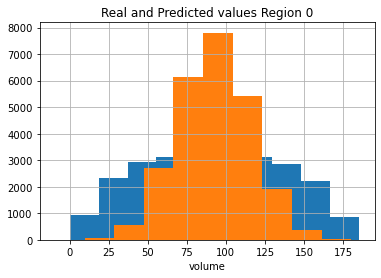

In [71]:
target_valid.hist()
predictions0.hist()
target.mean()
plt.title('Real and Predicted values Region 0')
plt.xlabel('volume')
plt.show()

In [72]:
state=np.random.RandomState(12345)
values1=[]

for i in range(1000):
    target_subsample1=target1_valid.sample(n=500, replace=True, random_state=state)
    predictions1=pd.Series(predictions1, index=target1_valid.index)
    probs_subsample1=predictions1[target_subsample1.index]
    values1.append(revenue(probs_subsample1, target_subsample1))

values1=pd.Series(values1)
risk1 = np.mean(values1 < 0)
lower=values1.quantile(0.025)
upper=values1.quantile(0.975)
print('lower:',lower, 'upper:',upper)
#print(upper)
#print(lower)
mean=values1.mean()
print('Average profit1', mean)
print('risk of losses region 1: {}%'.format(risk1))

lower: 688732.2537050088 upper: 9315475.912570495
Average profit1 5152227.734432902
risk of losses region 1: 0.01%


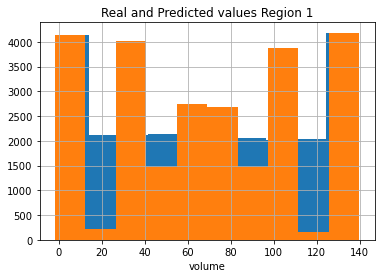

In [74]:
target1_valid.hist()
predictions1.hist()
plt.title('Real and Predicted values Region 1')
plt.xlabel('volume')
plt.show()

In [75]:
values2=[]

for i in range(1000):
    target_subsample2=target2_valid.sample(n=500, replace=True, random_state=state)
    predictions2=pd.Series(predictions2, index=target2_valid.index)
    probs_subsample2=predictions2[target_subsample2.index]
    values2.append(revenue(probs_subsample2, target_subsample2))

values2=pd.Series(values2)

risk2 = np.mean(values2 < 0)
lower=values2.quantile(0.025)
upper=values2.quantile(0.975)
print('lower:',lower, 'upper:',upper)
mean2=values2.mean()
print('Average profit 2:', mean2)
print('risk of losses region 2:n {}%'.format(risk2))

lower: -1359884.0523147471 upper: 9696189.965080727
Average profit 2: 4266493.222645484
risk of losses region 2:n 0.076%


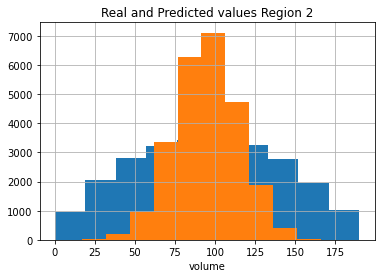

Average predicted values, region 2: 94.88423280885489
Average values, region 2: 95.00000000000041


In [77]:
target2_valid.hist()
predictions2.hist()
plt.title('Real and Predicted values Region 2')
plt.xlabel('volume')
plt.show()
print('Average predicted values, region 2:', target2_valid.mean())
print('Average values, region 2:', target2.mean())

Analysis: the least risk is for region 1 is the lowes and the average profit is the highest. However, the model for region 1 is under-performing with high rmse and the average and predicted volumes are much lower than the other two regions. I feel like I've made a mistake again.